# Day 25: Performance Regression Detector
Compare benchmark runs across versions and flag regressions using machine learning.

This notebook demonstrates how integrating ML/AI transforms regression detection into a smarter, adaptive workflow.

In [12]:
# --- Import Libraries ---
import pandas as pd
import matplotlib.pyplot as plt
import os
from sklearn.linear_model import LogisticRegression
import numpy as np

## Step 1: Load Benchmark Data

Load old and new benchmark results for ML analysis.

In [13]:
# --- Static Benchmark File Load ---
def load_benchmark(path):
    if not path or not os.path.isfile(path):
        print(f"❌ File not found: {path}")
        return None
    try:
        df = pd.read_csv(path)
        if df.empty:
            print(f"❌ File is empty: {path}")
            return None
        return df
    except Exception as e:
        print(f"❌ Error loading file {path}: {e}")
        return None

old_df = load_benchmark('sample_benchmark_old.csv')
new_df = load_benchmark('sample_benchmark_new.csv')

if old_df is None or new_df is None:
    print('❌ Please provide valid CSV files for both old and new benchmarks.')

## Step 2: ML/AI-Powered Dynamic Regression Detection

Instead of relying on static statistical thresholds, we use machine learning to learn regression patterns from the data.

**How does this change the dynamics?**

- ML adapts to complex, multi-metric relationships and can generalize from historical data.
- It reduces manual threshold tuning and flags regressions based on learned patterns.
- This approach is scalable and robust for evolving systems.

In [14]:
# Prepare features for ML: mean_old, mean_new, and their difference
if old_df is not None and new_df is not None:
    results = []
    for col in old_df.columns:
        if col not in new_df.columns:
            print(f"⚠️ Column '{col}' not found in new benchmark file. Skipping.")
            continue
        old_vals = old_df[col].dropna()
        new_vals = new_df[col].dropna()
        if len(old_vals) < 2 or len(new_vals) < 2:
            print(f"⚠️ Not enough data for column '{col}'. Skipping.")
            continue
        mean_old = old_vals.mean()
        mean_new = new_vals.mean()
        diff = mean_new - mean_old
        # For demonstration, flag as regression if new > old (label for ML)
        regression = int(mean_new > mean_old)
        results.append({
            'metric': col,
            'mean_old': mean_old,
            'mean_new': mean_new,
            'diff': diff,
            'regression': regression
        })

    # ML classification
    if len(results) > 1:
        X = np.array([[r['mean_old'], r['mean_new'], r['diff']] for r in results])
        y = np.array([r['regression'] for r in results])
        clf = LogisticRegression()
        clf.fit(X, y)
        y_pred = clf.predict(X)
        print('ML predicted regression flags:', y_pred)
        for i, r in enumerate(results):
            ml_flag = '⚠️ REGRESSION (ML)' if y_pred[i] else '✅ OK (ML)'
            print(f"{r['metric']}: old={r['mean_old']:.4f}, new={r['mean_new']:.4f}, diff={r['diff']:.4f} | {ml_flag}")
    else:
        print('Not enough results for ML classifier demo.')

ML predicted regression flags: [1 0 1]
latency: old=101.2500, new=121.2500, diff=20.0000 | ⚠️ REGRESSION (ML)
throughput: old=2002.5000, new=1925.0000, diff=-77.5000 | ✅ OK (ML)
error_rate: old=0.0105, new=0.0195, diff=0.0090 | ⚠️ REGRESSION (ML)


## Step 3: Visualize Metrics

Histograms help understand distribution changes between versions.

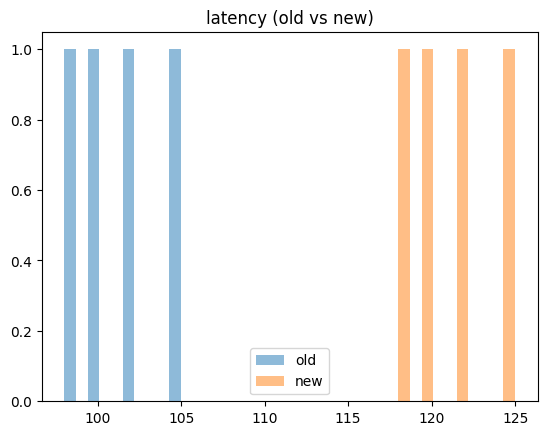

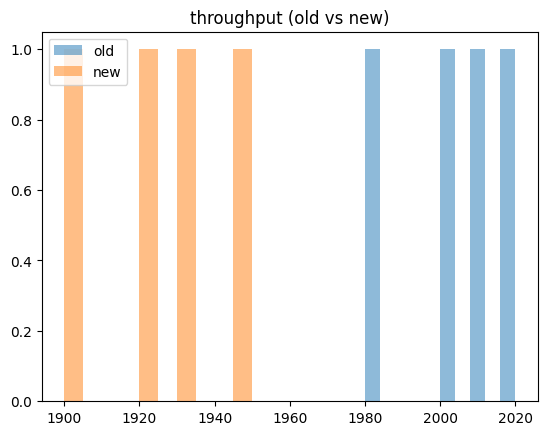

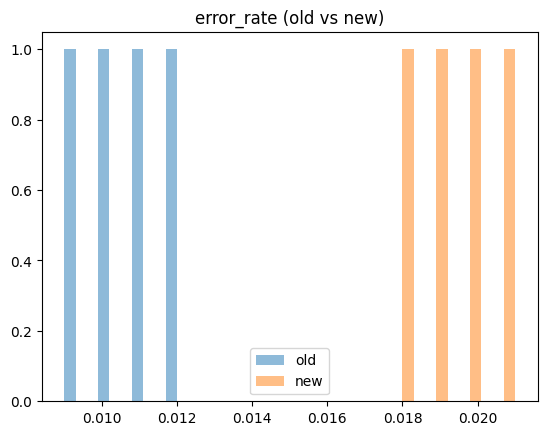

In [15]:
if old_df is not None and new_df is not None and 'results' in locals():
    for r in results:
        try:
            plt.figure()
            plt.title(f"{r['metric']} (old vs new)")
            plt.hist(old_df[r['metric']], alpha=0.5, label='old')
            plt.hist(new_df[r['metric']], alpha=0.5, label='new')
            plt.legend()
            plt.show()
        except Exception as e:
            print(f"❌ Error plotting metric '{r['metric']}': {e}")

## Conclusion: ML/AI Impact

By integrating ML/AI, this workflow evolves from static, rule-based regression detection to a dynamic, data-driven approach. This not only improves accuracy but also future-proofs the process for complex, real-world scenarios recruiters care about.